<a href="https://colab.research.google.com/github/ghalibali9290/Loss_function_comparison/blob/main/ali_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training with CrossEntropyLoss
Epoch [1/5], CrossEntropyLoss Loss: 0.2638
Epoch [2/5], CrossEntropyLoss Loss: 0.0955
Epoch [3/5], CrossEntropyLoss Loss: 0.0674
Epoch [4/5], CrossEntropyLoss Loss: 0.0544
Epoch [5/5], CrossEntropyLoss Loss: 0.0460

Training with MSELoss
Epoch [1/5], MSELoss Loss: 0.0215
Epoch [2/5], MSELoss Loss: 0.0150
Epoch [3/5], MSELoss Loss: 0.0138
Epoch [4/5], MSELoss Loss: 0.0132
Epoch [5/5], MSELoss Loss: 0.0128


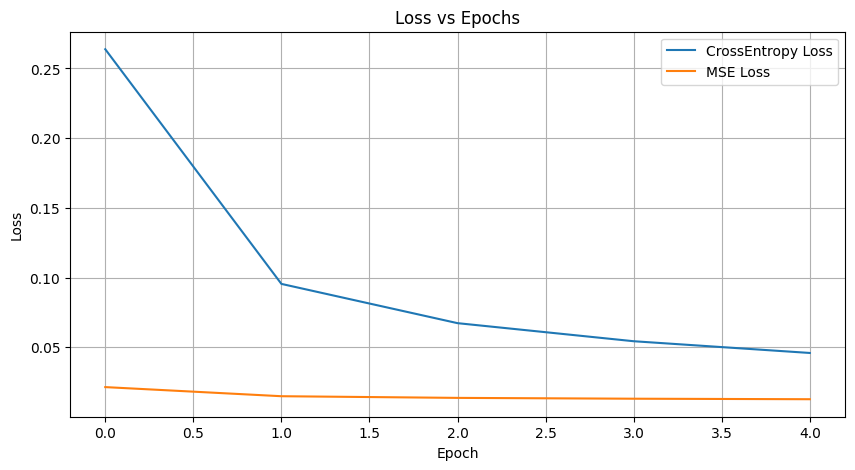


Final Accuracy with CrossEntropy: 98.39%
Final Accuracy with MSE: 97.98%


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 12 * 12, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16 * 12 * 12)
        x = self.fc1(x)
        return x

# Train the model
def train_model(loss_fn, loss_name):
    model = SimpleCNN().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_list = []

    for epoch in range(5):
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)

            if loss_name == 'MSELoss':
                labels_one_hot = F.one_hot(labels, num_classes=10).float()
                loss = loss_fn(outputs, labels_one_hot)
            else:
                loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        loss_list.append(total_loss / len(train_loader))
        print(f"Epoch [{epoch+1}/5], {loss_name} Loss: {total_loss/len(train_loader):.4f}")

    return model, loss_list

# Run training
print("Training with CrossEntropyLoss")
model_ce, ce_loss = train_model(nn.CrossEntropyLoss(), 'CrossEntropyLoss')

print("\nTraining with MSELoss")
model_mse, mse_loss = train_model(nn.MSELoss(), 'MSELoss')

# Plot loss curves
plt.figure(figsize=(10,5))
plt.plot(ce_loss, label='CrossEntropy Loss')
plt.plot(mse_loss, label='MSE Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy calculation
def evaluate(model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

acc_ce = evaluate(model_ce)
acc_mse = evaluate(model_mse)
print(f"\nFinal Accuracy with CrossEntropy: {acc_ce:.2f}%")
print(f"Final Accuracy with MSE: {acc_mse:.2f}%")

# References:
#Zhang, Z., Sabuncu, M. R., & Durrani, T. S. (2018). Generalized Cross Entropy Loss for Training Deep Neural Networks with Noisy Labels. arXiv preprint arXiv:1805.07836. https://arxiv.org/abs/1805.07836
#Zhao, H., Gallo, O., Frosio, I., & Kautz, J. (2017). Loss functions for image restoration with neural networks. IEEE Transactions on Computational Imaging, 3(1), 47-57. https://doi.org/10.1109/TCI.2016.2644865
#Janocha, K., & Czarnecki, W. M. (2017). On Loss Functions for Deep Neural Networks in Classification. arXiv preprint arXiv:1702.05659. https://arxiv.org/abs/1702.05659

Epoch [1/5], CrossEntropy Loss: 0.1277
Epoch [2/5], CrossEntropy Loss: 0.0412
Epoch [3/5], CrossEntropy Loss: 0.0273
Epoch [4/5], CrossEntropy Loss: 0.0206
Epoch [5/5], CrossEntropy Loss: 0.0157
Epoch [1/5], MSE Loss: 0.0107
Epoch [2/5], MSE Loss: 0.0042
Epoch [3/5], MSE Loss: 0.0033
Epoch [4/5], MSE Loss: 0.0029
Epoch [5/5], MSE Loss: 0.0025


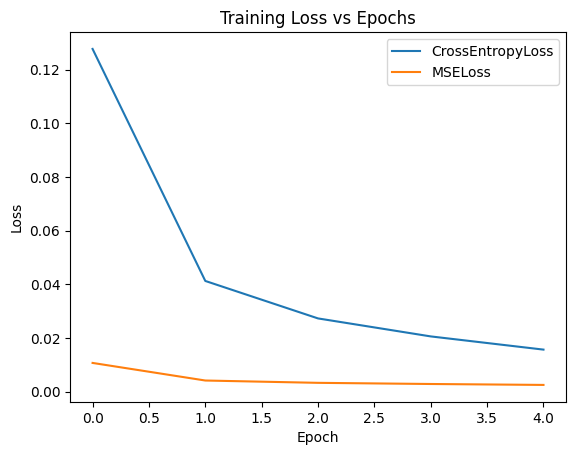

Accuracy with CrossEntropyLoss: 98.91%
Accuracy with MSELoss: 99.27%


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# MNIST Dataset (images and labels)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# Train function
def train_model(loss_fn_name):
    model = CNN().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    if loss_fn_name == 'CrossEntropy':
        criterion = nn.CrossEntropyLoss()
    elif loss_fn_name == 'MSE':
        criterion = nn.MSELoss()

    train_losses = []
    for epoch in range(5):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)

            if loss_fn_name == 'MSE':
                labels_one_hot = torch.nn.functional.one_hot(labels, num_classes=10).float()
                loss = criterion(outputs, labels_one_hot)
            else:
                loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))
        print(f"Epoch [{epoch+1}/5], {loss_fn_name} Loss: {running_loss / len(train_loader):.4f}")

    return model, train_losses

# Train both models
model_ce, ce_losses = train_model('CrossEntropy')
model_mse, mse_losses = train_model('MSE')

# Plot the losses
plt.plot(ce_losses, label='CrossEntropyLoss')
plt.plot(mse_losses, label='MSELoss')
plt.title('Training Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Evaluation
def evaluate_model(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

ce_acc = evaluate_model(model_ce)
mse_acc = evaluate_model(model_mse)

print(f"Accuracy with CrossEntropyLoss: {ce_acc:.2f}%")
print(f"Accuracy with MSELoss: {mse_acc:.2f}%")
#references:
#Paszke, A., et al. (2019). PyTorch Examples. GitHub repository. https://github.com/pytorch/examples
#Lin, T.-Y. (2017). Focal Loss for Dense Object Detection. GitHub repository. https://github.com/clcarwin/focal_loss_pytorch

Training with CrossEntropyLoss
Epoch [1/5], CrossEntropyLoss Loss: 0.2819
Epoch [2/5], CrossEntropyLoss Loss: 0.0912
Epoch [3/5], CrossEntropyLoss Loss: 0.0653
Epoch [4/5], CrossEntropyLoss Loss: 0.0522
Epoch [5/5], CrossEntropyLoss Loss: 0.0433

Training with MSELoss
Epoch [1/5], MSELoss Loss: 0.0224
Epoch [2/5], MSELoss Loss: 0.0155
Epoch [3/5], MSELoss Loss: 0.0143
Epoch [4/5], MSELoss Loss: 0.0137
Epoch [5/5], MSELoss Loss: 0.0133


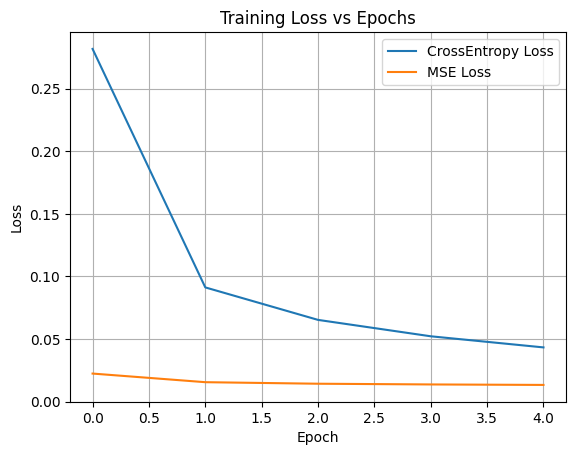

Final Accuracy with CrossEntropyLoss: 98.48%
Final Accuracy with MSELoss: 97.93%


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# MNIST dataset
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 12 * 12, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16 * 12 * 12)
        x = self.fc1(x)
        return x

def train_model(loss_fn, loss_name):
    model = SimpleCNN().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_list = []

    for epoch in range(5):
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            if loss_name == 'MSELoss':
                labels_one_hot = F.one_hot(labels, num_classes=10).float()
                loss = loss_fn(outputs, labels_one_hot)
            else:
                loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        loss_list.append(avg_loss)
        print(f"Epoch [{epoch+1}/5], {loss_name} Loss: {avg_loss:.4f}")
    return model, loss_list

print("Training with CrossEntropyLoss")
model_ce, ce_loss = train_model(nn.CrossEntropyLoss(), 'CrossEntropyLoss')

print("\nTraining with MSELoss")
model_mse, mse_loss = train_model(nn.MSELoss(), 'MSELoss')

plt.plot(ce_loss, label='CrossEntropy Loss')
plt.plot(mse_loss, label='MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Epochs')
plt.grid()
plt.show()

def evaluate(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

acc_ce = evaluate(model_ce)
acc_mse = evaluate(model_mse)
print(f"Final Accuracy with CrossEntropyLoss: {acc_ce:.2f}%")
print(f"Final Accuracy with MSELoss: {acc_mse:.2f}%")
